In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import warnings
warnings.filterwarnings('ignore')

#  1. Data Cleaning

In [152]:
df = pd.read_csv("spam.csv",encoding="latin-1")

In [153]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [155]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [157]:
df.rename(columns = {"v1":"target","v2":"text"},inplace=True)

In [158]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [159]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [160]:
# ham:0 , spam:1

In [161]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [162]:
df.duplicated().sum()

403

In [163]:
df =df.drop_duplicates(keep='first')

In [164]:
df.duplicated().sum()

0

## 2. EDA

In [166]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


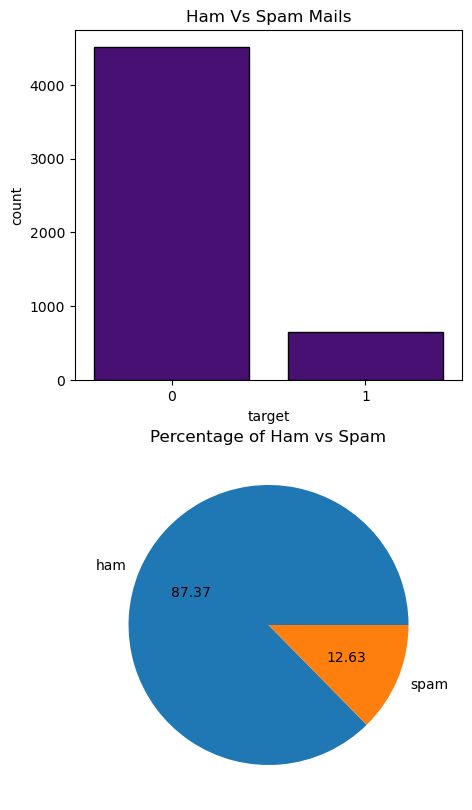

In [167]:
fig,axes = plt.subplots(2,1,figsize=(5,10))
sns.barplot(df['target'].value_counts(),color='indigo',edgecolor='black',ax = axes[0])
axes[0].set_title("Ham Vs Spam Mails")

axes[1].pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
axes[1].set_title("Percentage of Ham vs Spam")

plt.show()

We can see that most of the mails are ham which is normal considering that spam mails are not recieved quite often. Ham mails in the dataset is 87.37 % and spam mails in the dataset is 12.63% which indicates that the data is imbalanced.

In [168]:
import nltk
nltk.download('punkt', download_dir='nltk_data')

[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [169]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [170]:
df['num_characters'] = df['text'].apply(len)

In [171]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [172]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [173]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [174]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [199]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


There is a mail with only 2 characters and also there is a mail that has 910 characters. The least number of words in a mail is 1 words. It is quite interesting that maximum number of sentences in a mail is 38 sentences. The average number of characters and words in a mail is 60 characters and 15 words.

In [212]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #Ham mails

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


We can see that least number of characters in a mail is from ham mails and also highest number of words in a mail is also from ham mails. The average number of words and characters in a ham mail is 52 characters and 13 words.

In [216]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #Spam mails

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can see that spam mails conatin much more words as ham mails as the average number of characters and words 149 characters and 29 words.

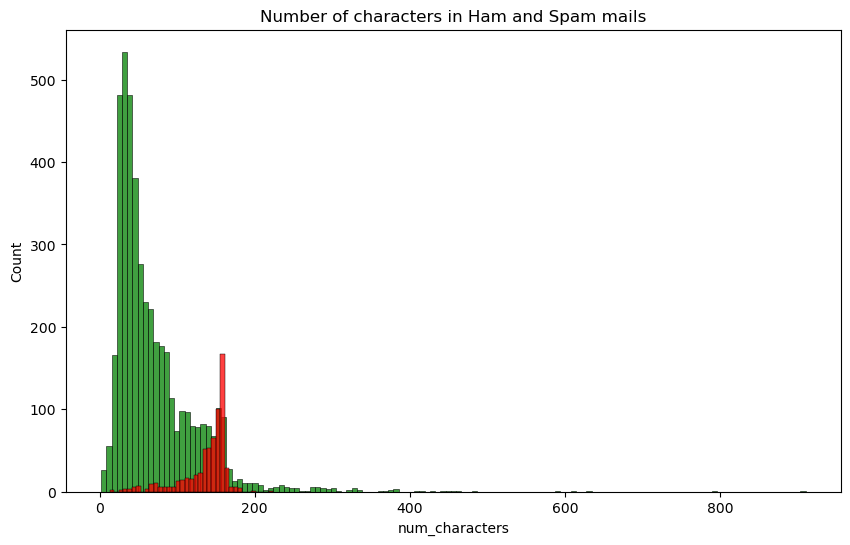

In [228]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.title('Number of characters in Ham and Spam mails')
plt.show()

Most of the ham mails have less number of characters compared to spam mails

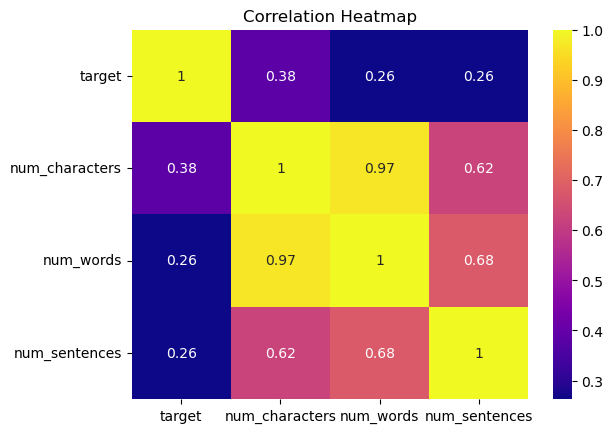

In [242]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True,cmap='plasma')
plt.title("Correlation Heatmap")
plt.show()

We can see that number of characters is having highest correlation with target compared to those of other features. Hence I will be dropping other features as they have high correlations with each other which makes sense as number of character increases, number of words increases and number of sentences also increase.

## 3. Data Preprocessing

In [256]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [258]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [262]:
df['transformed_text'] = df['text'].apply(transform_text)

In [469]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [268]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

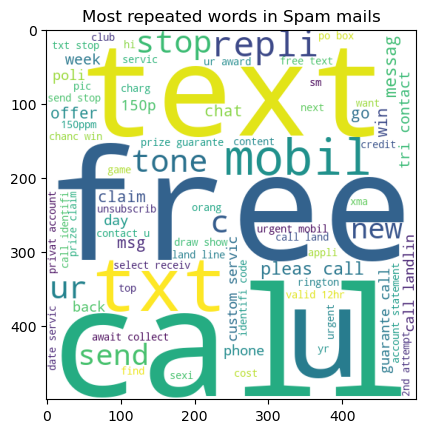

In [280]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.title("Most repeated words in Spam mails")
plt.show()

In [284]:
spam_words = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [334]:
spam_mail = pd.DataFrame(pd.DataFrame(spam_words).value_counts().head(30)).reset_index()

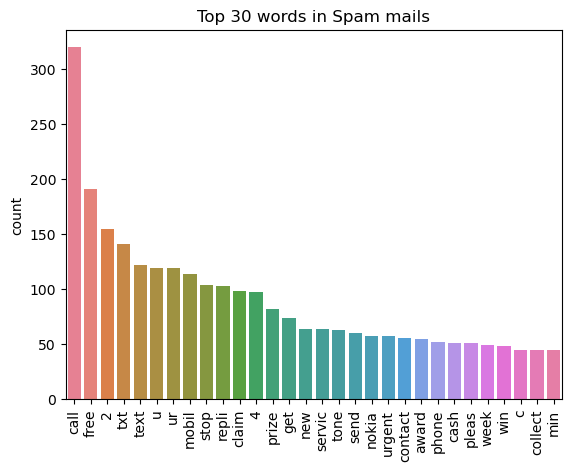

In [380]:
sns.barplot(x=spam_mail[0],y=spam_mail['count'],hue=spam_mail[0])
plt.xticks(rotation=90)
plt.title("Top 30 words in Spam mails")
plt.xlabel("")
plt.show()

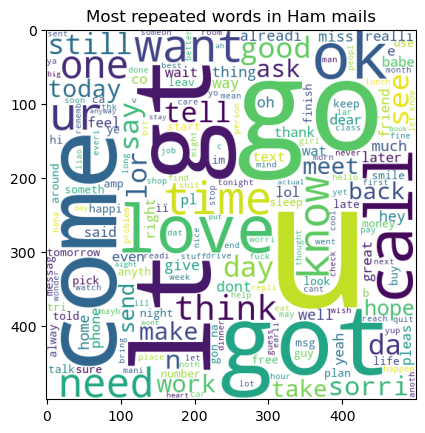

In [378]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.title("Most repeated words in Ham mails")
plt.show()

In [360]:
ham_words = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [366]:
ham_mail = pd.DataFrame(pd.DataFrame(ham_words).value_counts().head(30)).reset_index()

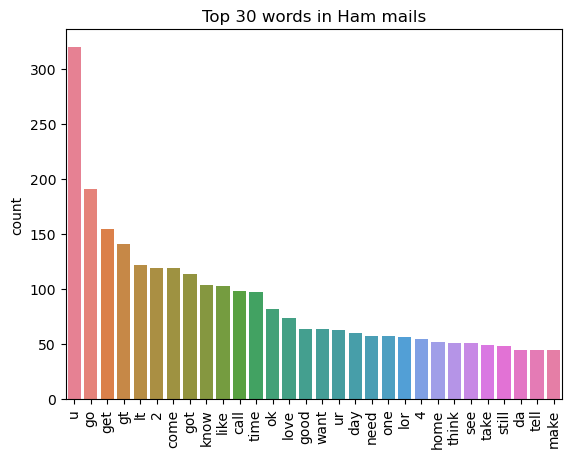

In [374]:
sns.barplot(x=ham_mail[0],y=spam_mail['count'],hue=ham_mail[0])
plt.xticks(rotation=90)
plt.title("Top 30 words in Ham mails")
plt.xlabel("")
plt.show()

## 4. Model Building

## 4.1. ContVectorizer

In [383]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [389]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [395]:
X.shape

(5169, 6708)

In [401]:
y = df['target'].values

In [403]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [407]:
from sklearn.model_selection import train_test_split

In [409]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [419]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [417]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [425]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred1)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred1)}")
print(f"Precision: {precision_score(y_test,y_pred1)}")

Accuracy: 0.8800773694390716
Confusion Matrix: [[792 104]
 [ 20 118]]
Precision: 0.5315315315315315


In [427]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred2)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred2)}")
print(f"Precision: {precision_score(y_test,y_pred2)}")

Accuracy: 0.9642166344294004
Confusion Matrix: [[871  25]
 [ 12 126]]
Precision: 0.8344370860927153


In [429]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred3)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred3)}")
print(f"Precision: {precision_score(y_test,y_pred3)}")

Accuracy: 0.9700193423597679
Confusion Matrix: [[893   3]
 [ 28 110]]
Precision: 0.9734513274336283


## 4.2. TfidfVectorizer

In [715]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [717]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [718]:
y1 = df['target'].values

In [719]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [720]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)
print(f"Accuracy: {accuracy_score(y1_test,y1_pred1)}")
print(f"Confusion Matrix: {confusion_matrix(y1_test,y1_pred1)}")
print(f"Precision: {precision_score(y1_test,y1_pred1)}")

Accuracy: 0.8597678916827853
Confusion Matrix: [[778 121]
 [ 24 111]]
Precision: 0.47844827586206895


In [721]:
mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(f"Accuracy: {accuracy_score(y1_test,y1_pred2)}")
print(f"Confusion Matrix: {confusion_matrix(y1_test,y1_pred2)}")
print(f"Precision: {precision_score(y1_test,y1_pred2)}")

Accuracy: 0.9613152804642167
Confusion Matrix: [[899   0]
 [ 40  95]]
Precision: 1.0


In [722]:
bnb.fit(X1_train,y1_train)
y1_pred3 = bnb.predict(X1_test)
print(f"Accuracy: {accuracy_score(y1_test,y1_pred3)}")
print(f"Confusion Matrix: {confusion_matrix(y1_test,y1_pred3)}")
print(f"Precision: {precision_score(y1_test,y1_pred3)}")

Accuracy: 0.9700193423597679
Confusion Matrix: [[898   1]
 [ 30 105]]
Precision: 0.9905660377358491


We can see that Multinomial Naive Bayes is working really good with TfidfVectorizer. Precision is most important as in spam classification we need to minimize false positives as much as possible.

In [729]:
import joblib
joblib.dump(tfidf,"tfidf.pkl")
joblib.dump(mnb,"model.pkl")

['model.pkl']